In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data loading

dataset = pd.read_csv('/content/drive/MyDrive/clast/Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825


In [ ]:
nulls = dataset.isna().sum()
nulls.sum()

0

Пропусков нет

In [ ]:
dataset.shape

(23479, 500)

Text(0, 0.5, 'bit ADC')

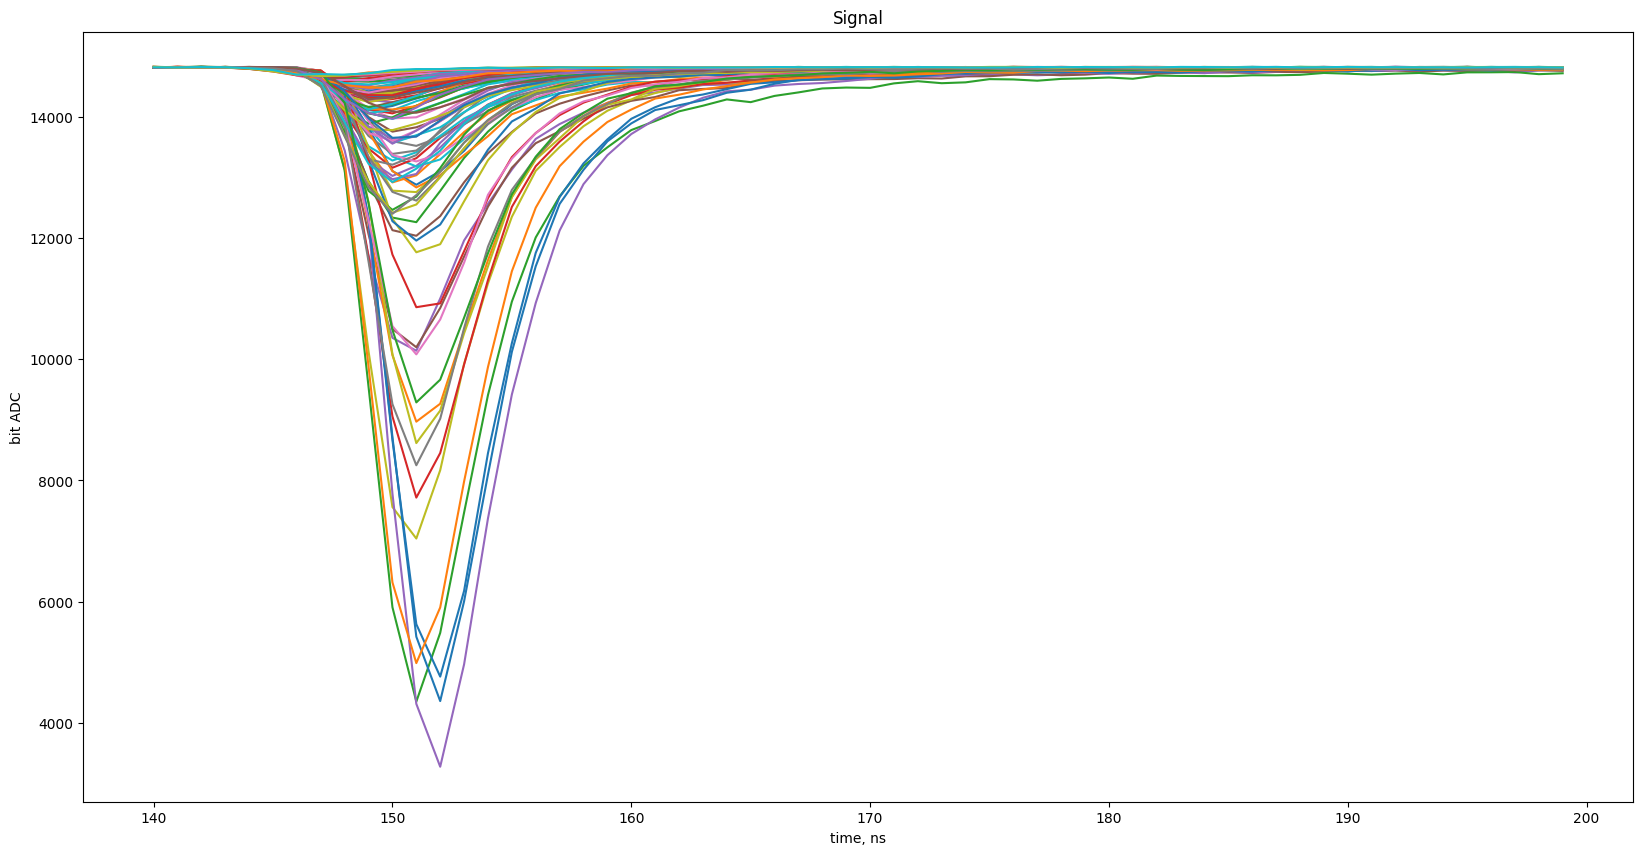

In [ ]:
N=range(0,100)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

Text(0, 0.5, 'bit ADC')

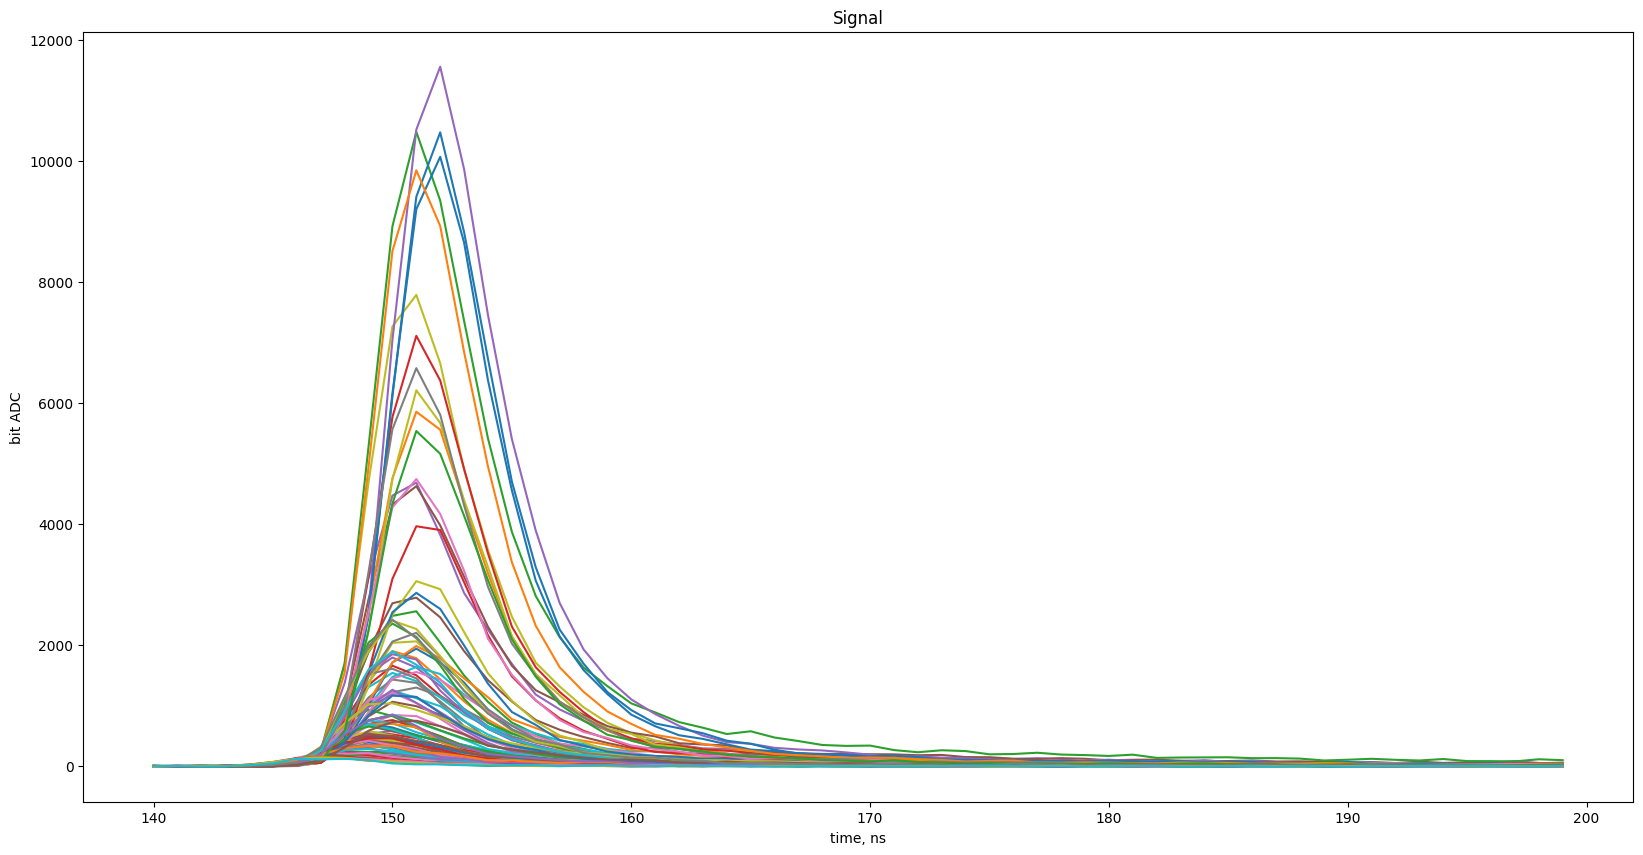

In [ ]:
ax = (2**14-dataset.T[N]-1560)[140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


In [ ]:
from scipy.integrate import simpson

areas = np.array([0]*23479)
amplitudes = np.array([0]*23479)
for i in range(23479):
  x = np.array(2**14-dataset.T[i]-1560)
  areas[i] = simpson(y=x, x=np.arange(0, len(x)))
  amplitudes[i] = max(x) - min(x)

df = pd.DataFrame({'s': areas, 'a': amplitudes})
df.index.name = 'index'
df

,s,a
index,,
0,5974,539
1,13095,1907
2,17948,2566
3,5223,573
4,12887,1800
...,...,...
23474,3295,512
23475,45791,5774
23476,39504,5004


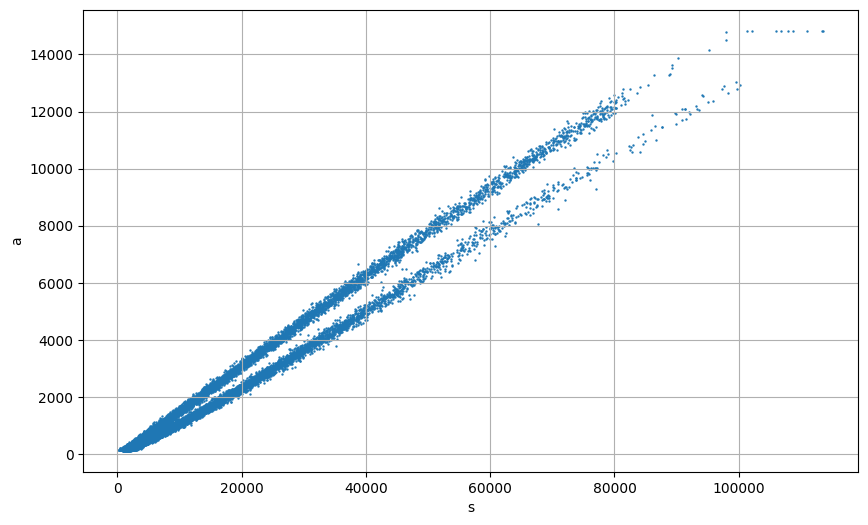

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['s'], df['a'], s=0.5)
plt.xlabel('s')
plt.ylabel('a')
plt.grid()

In [ ]:
from sklearn.cluster import DBSCAN

# Выбираем параметры DBSCAN
eps = 110000
min_samples = 1000

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster'] = dbscan.fit_predict(df[['s', 'a']])

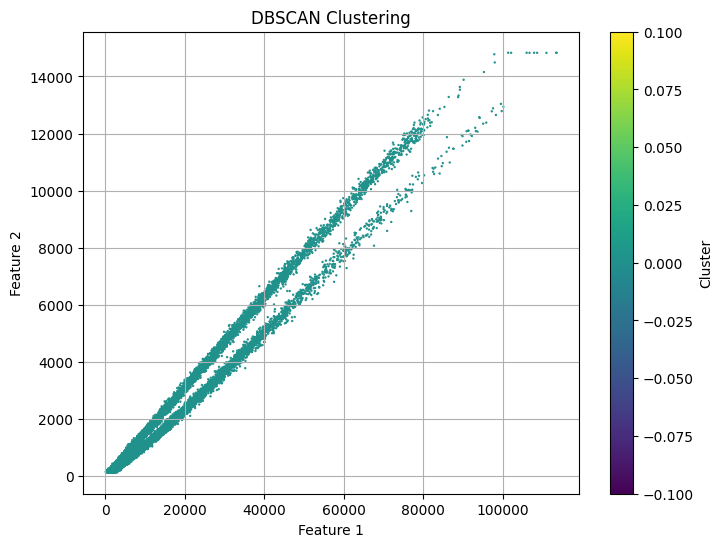

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['s'], df['a'], c=df['cluster'], cmap='viridis', s=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

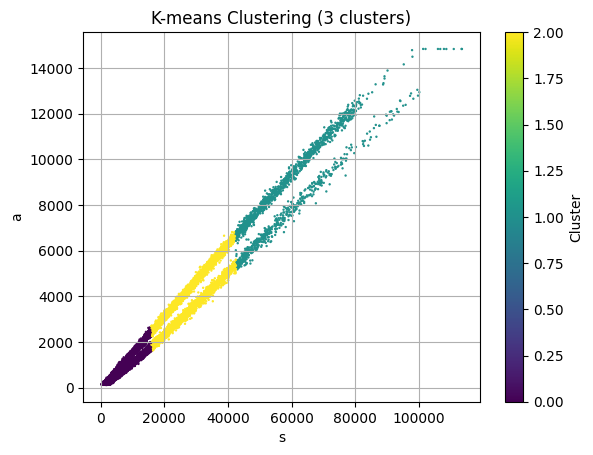

Silhouette Score: 0.6935778491883814
Score: 78408.43541736362


In [ ]:
from sklearn.cluster import KMeans

# Создаем модель KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)

# Применяем модель к данным
df['cluster'] = kmeans.fit_predict(df[['s', 'a']])

# Визуализация
plt.scatter(df['s'], df['a'], c=df['cluster'], cmap='viridis', s=0.5)
plt.title('K-means Clustering (3 clusters)')
plt.xlabel('s')
plt.ylabel('a')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

X = df[['s', 'a']].values
y = df['cluster'].values
silhouette_avg = silhouette_score(X, y)
calinski_harabasz_index = calinski_harabasz_score(X, y)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Score: {calinski_harabasz_index}")

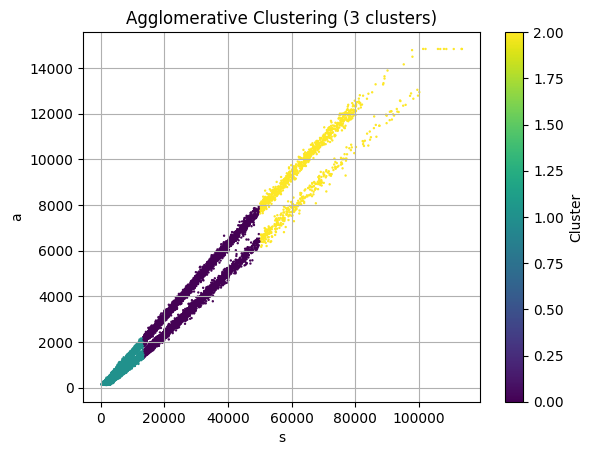

Silhouette Score: 0.6770021511660624
Score: 67064.99221494183


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Создаем модель AgglomerativeClustering с 3 кластерами
agglo = AgglomerativeClustering(n_clusters=3)

# Применяем модель к данным
df['cluster'] = agglo.fit_predict(df[['s', 'a']])

# Визуализация
plt.scatter(df['s'], df['a'], c=df['cluster'], cmap='viridis', s=0.5)
plt.title('Agglomerative Clustering (3 clusters)')
plt.xlabel('s')
plt.ylabel('a')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

X = df[['s', 'a']].values
y = df['cluster'].values
silhouette_avg = silhouette_score(X, y)
calinski_harabasz_index = calinski_harabasz_score(X, y)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Score: {calinski_harabasz_index}")

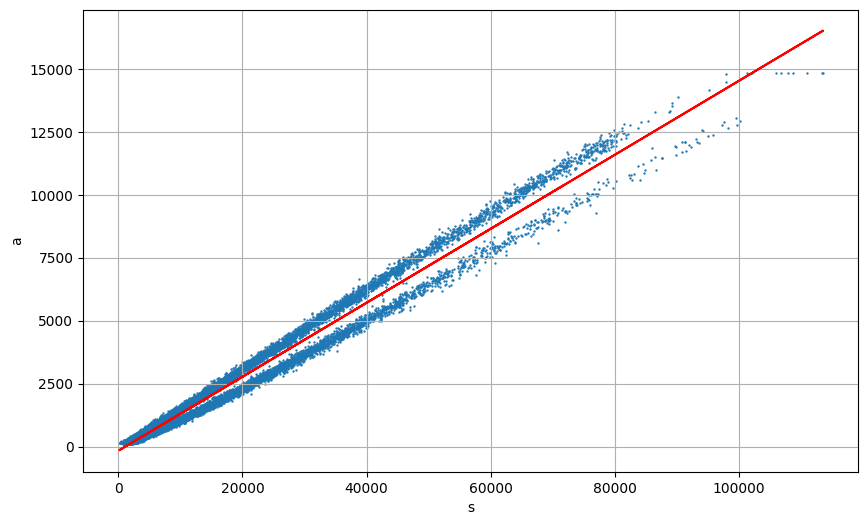

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['s'], df['a'], s=0.5)
plt.xlabel('s')
plt.ylabel('a')
plt.grid()

# Преобразуем данные в массивы numpy
X = df['s'].values.reshape(-1, 1)
Y = df['a'].values

X = np.hstack((np.ones((X.shape[0], 1)), X))

beta = np.linalg.inv(X.T @ X) @ X.T @ Y

# Коэффициенты
c = beta[0]
b = beta[1]

plt.plot(X, b*X + c, c='r')

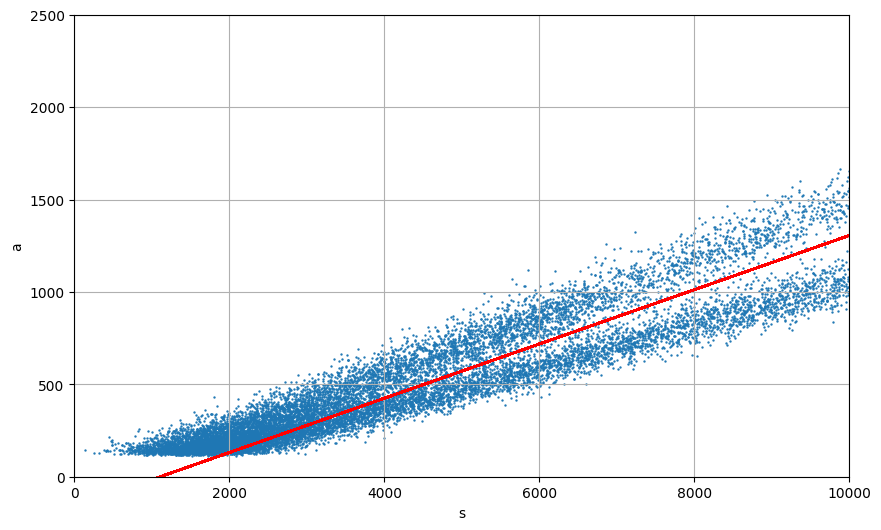

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['s'], df['a'], s=0.5)
plt.xlabel('s')
plt.ylabel('a')
plt.xlim(0, 10000)
plt.ylim(0, 2500)
plt.grid()
plt.plot(X, b*X + c, c='r')

После значения площади в 6000 видим дольно отчетливое разделение лучей. Пусть 3-й кластер - это "корень" этих лучей. Используем Кmeans в этом интервале чтобы отделить наиболее плотно расположенные друг к другу точки от начала лучей

In [ ]:
df = df[['s', 'a']]
df_root = df[df['s'] <=6000].copy()
df_root

,s,a
index,,
0,5974,539
3,5223,573
5,3786,243
7,1847,174
10,2922,412
...,...,...
23462,4558,407
23463,5612,583
23465,2062,221


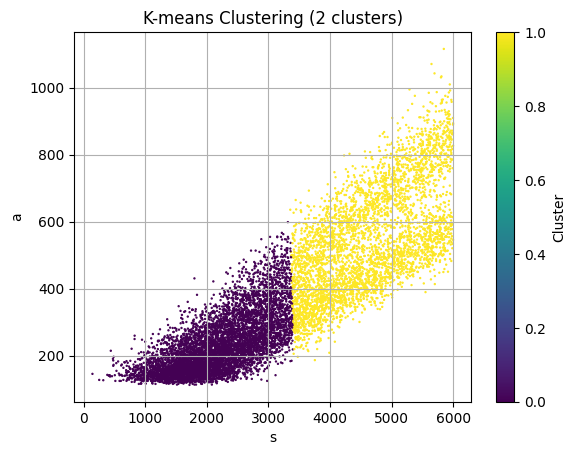

Silhouette Score: 0.6322490415410212
Score: 31022.071117379062


In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
df_root['cluster'] = kmeans2.fit_predict(df_root[['s', 'a']])

# Визуализация
plt.scatter(df_root['s'], df_root['a'], c=df_root['cluster'], cmap='viridis', s=0.5)
plt.title('K-means Clustering (2 clusters)')
plt.xlabel('s')
plt.ylabel('a')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

X = df_root[['s', 'a']].values
y = df_root['cluster'].values
silhouette_avg = silhouette_score(X, y)
calinski_harabasz_index = calinski_harabasz_score(X, y)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Score: {calinski_harabasz_index}")

In [ ]:
cl_0 = df_root[df_root['cluster']==0].copy()
cl_0['cluster'] = 2
cl_1 = df_root[df_root['cluster']==1]
cl_1 = cl_1[['s', 'a']]
df = df[df['s'] > 6000]
df_ray = pd.concat([cl_1, df])
df_ray

,s,a
index,,
0,5974,539
3,5223,573
5,3786,243
11,3742,486
19,5472,862
...,...,...
23473,7031,960
23475,45791,5774
23476,39504,5004


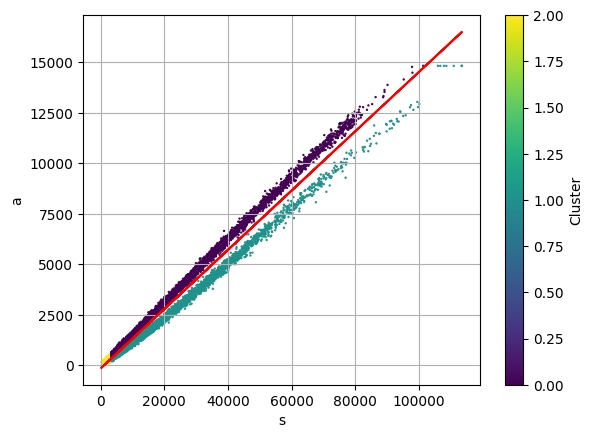

In [ ]:
df_ray['cluster'] = df_ray.apply(lambda row: 0 if row['a'] < b * row['s'] + c else 1, axis=1)
df_res = pd.concat([cl_0, df_ray])

plt.scatter(df_res['s'], df_res['a'], c=df_res['cluster'], cmap='viridis', s=0.5)
plt.xlabel('s')
plt.ylabel('a')
plt.colorbar(label='Cluster')
plt.grid()
X = df_res['s'].values.reshape(-1, 1)
Y = df_res['a'].values
plt.plot(X, b*X + c, c='r')

In [ ]:
X = df_res[['s', 'a']].values
y = df_res['cluster'].values
silhouette_avg = silhouette_score(X, y)
calinski_harabasz_index = calinski_harabasz_score(X, y)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Score: {calinski_harabasz_index}")

Silhouette Score: 0.04680900579324671
Score: 3181.9583967279455


In [ ]:
out = df_res['cluster'].sort_values()
out.to_csv('out.csv', header=True, index=True)
out

,cluster
index,
23478,0
9806,0
9808,0
9809,0
9814,0
...,...
15790,2
15791,2
15795,2
